In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Configurable directory for outputs
base_dir = "outputs"  # Change this to the desired directory

# Initialize lists to store data from all splits
all_train_logs = []
all_test_results = []

# Load data from all splits
for split_index in range(1, 6):
    # Construct paths dynamically
    test_results_path = os.path.join(base_dir, f'split_{split_index}', 'test_results.json')
    training_log_path = os.path.join(base_dir, f'split_{split_index}', 'training_log.csv')
    
    # Load the test results JSON data
    with open(test_results_path, 'r') as f:
        test_results = json.load(f)
        all_test_results.append(test_results)
    
    # Load the training log CSV data
    training_log = pd.read_csv(training_log_path)
    all_train_logs.append(training_log)

summary_data_path = os.path.join(base_dir, 'summary.json')
 
# Load the summary JSON data
with open(summary_data_path, 'r') as f:
    summary_data = json.load(f)

# Extract summary data
mean_loss = summary_data['mean_loss']
mean_accuracy = summary_data['mean_accuracy']
mean_auprc = summary_data['mean_auprc']
mean_auroc = summary_data['mean_auroc']
std_loss = summary_data['std_loss']
std_accuracy = summary_data['std_accuracy']
std_auprc = summary_data['std_auprc']
std_auroc = summary_data['std_auroc']


In [20]:

# Prepare data for the table
metrics = ['Loss', 'Accuracy', 'AUPRC', 'AUROC']
means = [
    summary_data['mean_loss'], 
    summary_data['mean_accuracy'], 
    summary_data['mean_auprc'], 
    summary_data['mean_auroc']
]
stds = [
    summary_data['std_loss'], 
    summary_data['std_accuracy'], 
    summary_data['std_auprc'], 
    summary_data['std_auroc']
]

# Create a DataFrame
data = {
    "Metric": metrics,
    "Mean": means,
    "Std Dev": stds,
    "Mean ± Std Dev": [f"{mean} ± {std}" for mean, std in zip(means, stds)]
}
df = pd.DataFrame(data)

# Display the table
df.style.set_table_styles([
    {'selector': 'thead', 'props': [('font-weight', 'bold')]}
])


,Metric,Mean,Std Dev,Mean ± Std Dev
0,Loss,0.426313,0.022362,0.4263128340244293 ± 0.022362055256962776
1,Accuracy,0.426313,0.022362,0.4263128340244293 ± 0.022362055256962776
2,AUPRC,0.426313,0.022362,0.4263128340244293 ± 0.022362055256962776
3,AUROC,0.426313,0.022362,0.4263128340244293 ± 0.022362055256962776


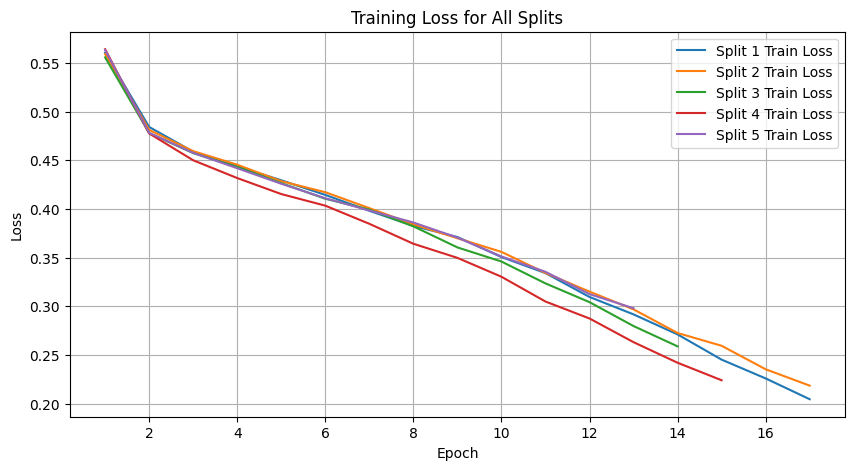

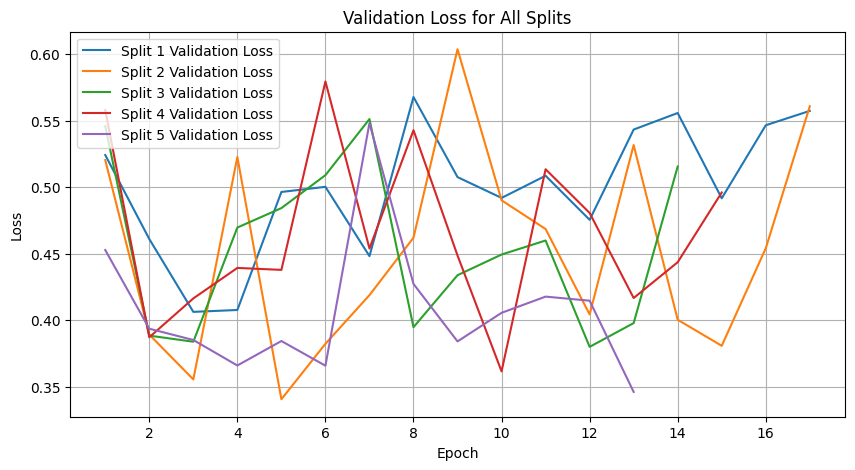

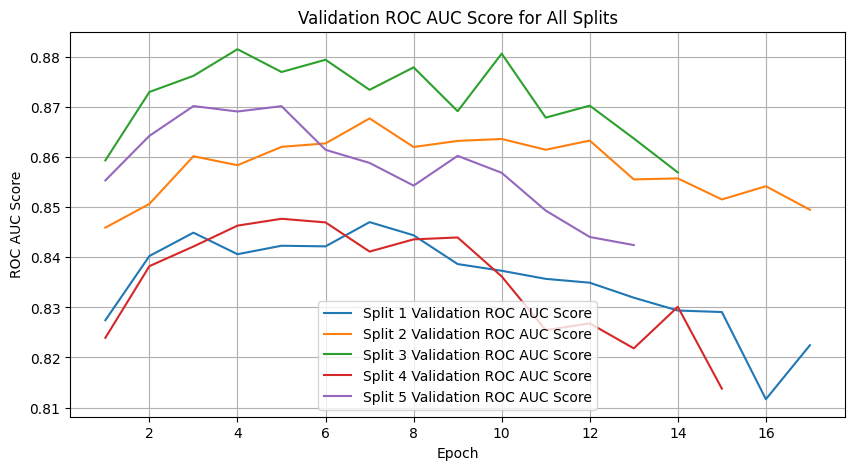

In [17]:
# Plot training loss for each split
plt.figure(figsize=(10, 5))
for split_index, training_log in enumerate(all_train_logs, start=1):
    plt.plot(training_log['epoch'], training_log['train_loss'], label=f'Split {split_index} Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for All Splits')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation loss for each split
plt.figure(figsize=(10, 5))
for split_index, training_log in enumerate(all_train_logs, start=1):
    plt.plot(training_log['epoch'], training_log['val_loss'], label=f'Split {split_index} Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss for All Splits')
plt.legend()
plt.grid(True)
plt.show()

# Plot validation ROC AUC score for each split
plt.figure(figsize=(10, 5))
for split_index, training_log in enumerate(all_train_logs, start=1):
    plt.plot(training_log['epoch'], training_log['val_roc_auc_score'], label=f'Split {split_index} Validation ROC AUC Score')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC Score')
plt.title('Validation ROC AUC Score for All Splits')
plt.legend()
plt.grid(True)
plt.show()
